In [25]:
from diff_calc import mathLexer
from diff_parse import mathParser
from diff_plotter import plot, show
import matplotlib.pyplot as plt
from IPython.display import display

In [26]:
expression = "{diff x} {3*x^4}"

# как добавить diff_arg в код, и как считывать его
# нужно ли обрабатывать нули и 1 и где это делать

In [27]:
lexer  = mathLexer()
parser = mathParser()

In [28]:
for token in lexer.tokenize(expression):
    print(token)

Token(type='{', value='{', lineno=1, index=0)
Token(type='DIFF', value='diff', lineno=1, index=1)
Token(type='ID', value='x', lineno=1, index=6)
Token(type='}', value='}', lineno=1, index=7)
Token(type='{', value='{', lineno=1, index=9)
Token(type='NUMBER', value=3, lineno=1, index=10)
Token(type='TIMES', value='*', lineno=1, index=11)
Token(type='ID', value='x', lineno=1, index=12)
Token(type='POW', value='^', lineno=1, index=13)
Token(type='NUMBER', value=4, lineno=1, index=14)
Token(type='}', value='}', lineno=1, index=15)


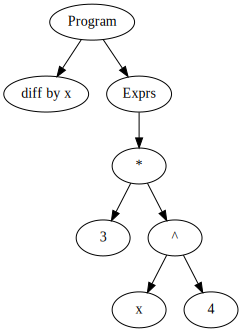

In [29]:
result = parser.parse(lexer.tokenize(expression))
result.dot

In [30]:
result.exprs.expr.funcs

{}

In [31]:
result.funcs.func

AttributeError: 'NoneType' object has no attribute 'func'

In [33]:
exec_result = result.exec()

In [34]:
exec_result['python_exprs']

['(3*(x**4))']

In [35]:
exec_result['diff_exprs']

['4*x**(4-1)*3']

In [36]:
exec_result['python_exprs'][1]

IndexError: list index out of range

1000000
1000000
(3.851402889397716e-39, 1875.0)


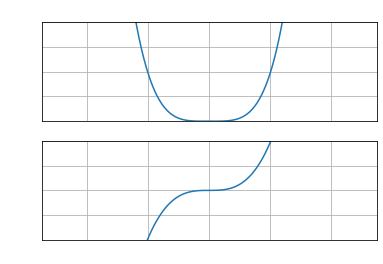

In [38]:
import math
for i in range(0,len(exec_result['python_exprs'])):
    init = exec_result['python_exprs'][i]
    diff_init = exec_result['diff_exprs'][i]
    a, b = -5, 5
    init_plot = plot(init,a,b)
    diff_plot = plot(diff_init,a,b)
    show(init_plot,diff_plot)


In [ ]:
# for i in range(0,len(exec_result['python_exprs'])):
#     init = exec_result['python_exprs'][i]
#     diff_init = exec_result['diff_exprs'][i]
#     fig = plt.figure()
#     init_plot = plot(init,-100,100)
#     diff_plot = plot(diff_init,-100,100)
#     ax1 = plt.subplot(211)
#     ax1.plot(init_plot[0], init_plot[1],label = 'original')
#     ax2 = plt.subplot(212)
#     ax2.plot(diff_plot[0], diff_plot[1], label = 'diff')
#     ax1.grid()
#     ax2.grid()
#     ax1.set_title("function",color = 'w')
#     ax2.set_title("diff", color = 'w')
#     ax1.label_outer()
#     ax2.label_outer()
#     # plt.xticks(color='w')
#     ax1.tick_params(colors='w', which='both')
#     ax2.tick_params(colors='w', which='both')
#     plt.show()